Matplotlib is building the font cache; this may take a moment.


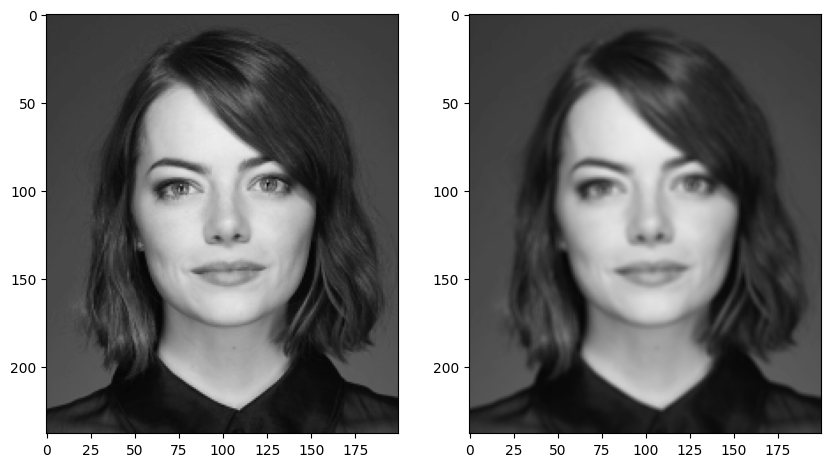

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('C:/Users/Dell/.ipython/1.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

kernel = np.ones((3,3), np.float32)/9.
result = cv.filter2D(im, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

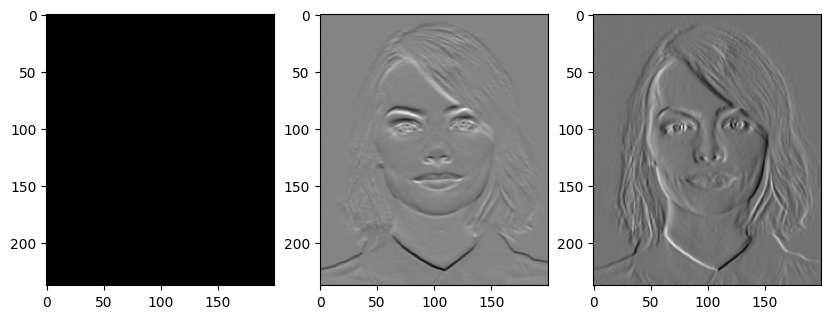

In [2]:


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('C:/Users/Dell/.ipython/1.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

im = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX) # Converting to a float image in [0,1]
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
result_v = cv.filter2D(im, -1, sobel_v)
result_v = cv.normalize(result_v, result_v, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)
result_h = cv.filter2D(im, -1, sobel_h)
result_h = cv.normalize(result_h, result_h, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)

fig, ax = plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(result_h, cmap='gray', vmin=0, vmax=255)
plt.show()



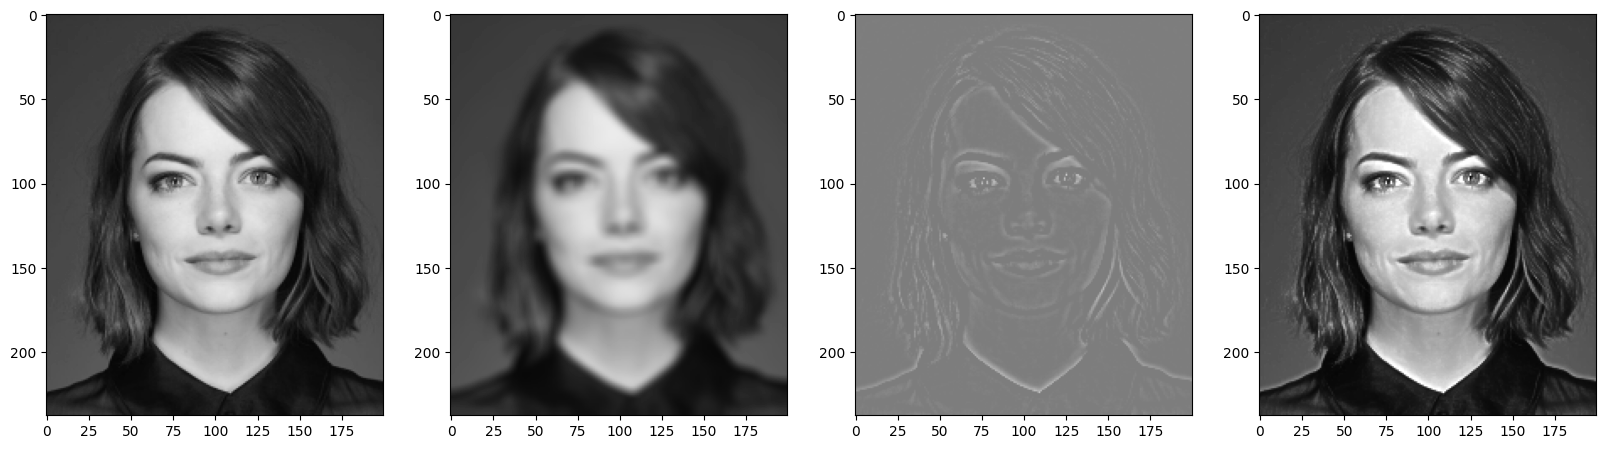

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('C:/Users/Dell/.ipython/1.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

gaus = cv.getGaussianKernel(7, 4) # 1-D Gaussina kernel 
smooth = cv.sepFilter2D(im, -1, gaus, gaus) # Gaussian smoothig. Produces the blurred (low-pass) image. 
hp = cv.addWeighted(im, 1.0, smooth, -1, 0) # High-pass verion by subtracting the smoothed image from the original.
sharpened = cv.addWeighted(im, 1.0, hp, 1.5, 0) # Actual sharpening operation.

fig, ax = plt.subplots(1,4, figsize=(20,40))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(smooth, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(hp + 125, cmap='gray', vmin=0, vmax=255)
ax[3].imshow(sharpened, cmap='gray', vmin=0, vmax=255)
plt.show()

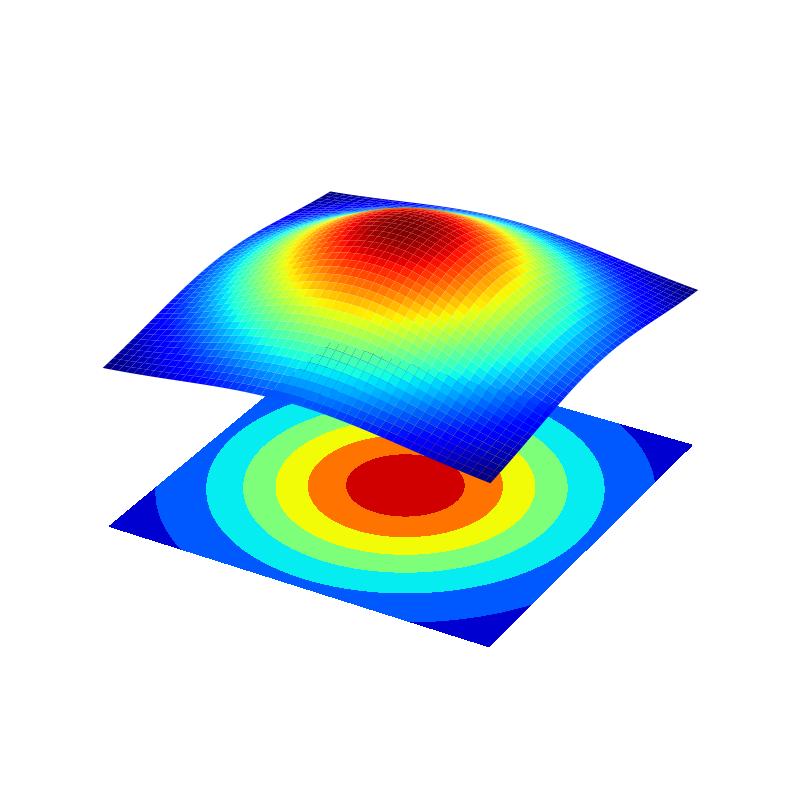

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
step = 1/100.
x = np.arange(-5, 5 + step, step)
y = np.arange(-5, 5 + step, step)
YY, XX= np.meshgrid(x, y)
sigma = 3.
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(XX, YY, g, cmap=cm.jet, linewidth=0, antialiased=True)
# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
cset = ax.contourf(XX, YY, g, zdir='z', offset=np.min(g) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(g) - 2, np.max(g))
plt.axis('off')
plt.show()

In [5]:
import numpy as np
step = 1/1.
w, h = 3, 3
hw, hh = w//2, h//2
x = np.arange(-hh, hh + step, step)
y = np.arange(-hw, hw + step, step)
YY, XX= np.meshgrid(x, y)
sigma = 1.
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= sum(g.flatten()) # NOrmalization
g

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
import numpy as np
from scipy import stats



def noisy(noise_typ,image):    
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                    n is uniform noise with specified mean & variance.
        
        Source: https://stackoverflow.com/a/30609854
    """    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p":
        # row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        return noisy
    
img = cv.imread('C:/Users/Dell/.ipython/1.jpg', cv.IMREAD_COLOR)
imn =  noisy('s&p', img.astype('float32'))

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img)
cv.waitKey(0)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

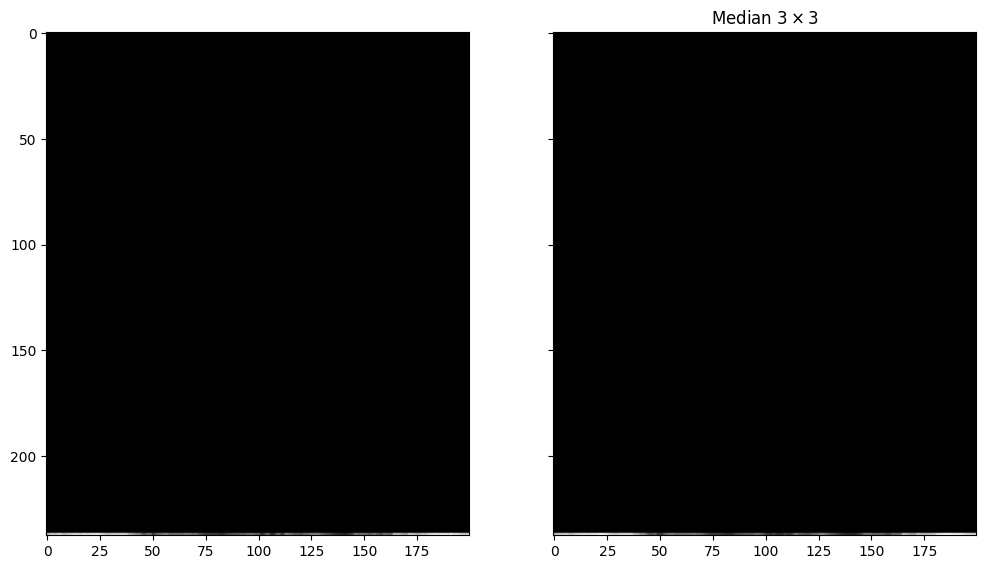

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('C:/Users/Dell/.ipython/1.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
imn =  noisy('s&p', img.astype('float32')) # Using the noisy funciton already coded.

imf = cv.medianBlur(imn, 3) # Median filtering 
fig, axes  = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,12))

axes[0].imshow(imn, cmap='gray')
axes[1].imshow(imf, cmap='gray')
axes[1].set_title(r'Median ${0}\times {0}$'.format(3))

plt.show()

In [3]:
!jupyter nbconvert --to html ex3.ipynb 

[NbConvertApp] Converting notebook ex3.ipynb to html
[NbConvertApp] Writing 1614203 bytes to ex3.html
